# 단순 선형 회귀

# < 사이킷런에서 최소제곱법으로 단순 선형회귀 수행 >

### 필요한 모듈 import

In [232]:
import pandas as pd
import numpy as np
import sklearn

# 1. 맥주 데이터를 활용한 단순 선형 회귀 실습

### 데이터 수집

In [185]:
beer = pd.read_csv('C:/python/data/beer.csv')
beer

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8
5,40.9,4.2
6,60.2,13.5
7,63.3,26.0
8,51.1,23.3
9,44.9,8.5


### 데이터 탐색

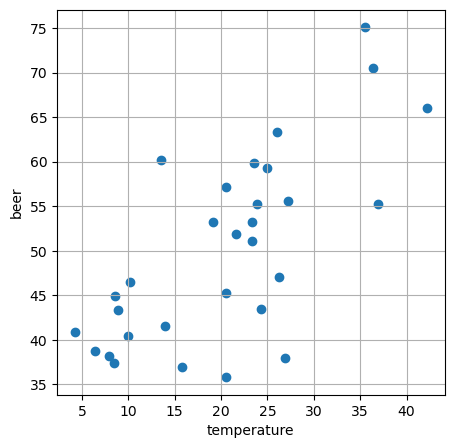

In [229]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 5))
plt.scatter(x = beer.temperature, y = beer.beer)
plt.xlabel('temperature')
plt.ylabel('beer')
plt.grid() # 격자 추가
plt.show()

In [189]:
# 독립 변수, 종속 변수 확인
beer.temperature

0     20.5
1     25.0
2     10.0
3     26.9
4     15.8
5      4.2
6     13.5
7     26.0
8     23.3
9      8.5
10    26.2
11    19.1
12    24.3
13    23.3
14     8.4
15    23.5
16    13.9
17    35.5
18    27.2
19    20.5
20    10.2
21    20.5
22    21.6
23     7.9
24    42.2
25    23.9
26    36.9
27     8.9
28    36.4
29     6.4
Name: temperature, dtype: float64

In [165]:
# 종속 변수 확인, 레코드 수 확인

In [166]:
beer.beer

0     45.3
1     59.3
2     40.4
3     38.0
4     37.0
5     40.9
6     60.2
7     63.3
8     51.1
9     44.9
10    47.0
11    53.2
12    43.5
13    53.2
14    37.4
15    59.9
16    41.5
17    75.1
18    55.6
19    57.2
20    46.5
21    35.8
22    51.9
23    38.2
24    66.0
25    55.3
26    55.3
27    43.3
28    70.5
29    38.8
Name: beer, dtype: float64

In [167]:
len(beer)

30

###  데이터 준비 - 학습용 / 검증용 데이터 분리

In [190]:
데이터 준비 - 학습용 / 검증용 데이터 분리

In [191]:
# 학습용 검증용 데이터셋 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(\
                                    x,y, test_size = 0.2, random_state = 1)

In [192]:
len(x_train),len(x_test),len(y_train),len(y_test)

(24, 6, 24, 6)

### 모델 구축

In [193]:

#모델 클래스 선택 후 인스턴스 객체 생성

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [194]:
# 학습 수행
reg = lr.fit(x_train, y_train)

In [195]:
# 계수 및 절편 확인: _속성은 학습을 통해 결정되는 속성
w1 = reg.coef_[0] # 값만 가져오기
w0 = reg.intercept_
w1

0.6970564800166287

In [196]:
#회귀식
print(f'y = {w1:2f}x + {w0:.5f}')

y = 0.697056x + 36.06667


In [197]:
# 구축된 모델에서 예측 수행
y_pred = reg.predict(x_test)   # 6개의 예측값이 나옴

In [198]:
y_test   # (실제값)

array([75.1, 35.8, 47. , 57.2, 37.4, 46.5])

### 모델 성능 평가

In [230]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#MSE

mse = mean_squared_error(y_test, y_pred)

#RMSE

rmse = np.sqrt(mse)


In [178]:
#결정계수 R2
r2 = r2_score(y_test, y_pred)

print(mse, rmse, r2)

91.34656925529704 9.557539916489862 0.48456481297951504


### 시각화

In [179]:
np.arange(beer.temperature.min() - 1, beer.temperature.max() +1) # 하나 왼쪽

array([ 3.2,  4.2,  5.2,  6.2,  7.2,  8.2,  9.2, 10.2, 11.2, 12.2, 13.2,
       14.2, 15.2, 16.2, 17.2, 18.2, 19.2, 20.2, 21.2, 22.2, 23.2, 24.2,
       25.2, 26.2, 27.2, 28.2, 29.2, 30.2, 31.2, 32.2, 33.2, 34.2, 35.2,
       36.2, 37.2, 38.2, 39.2, 40.2, 41.2, 42.2])

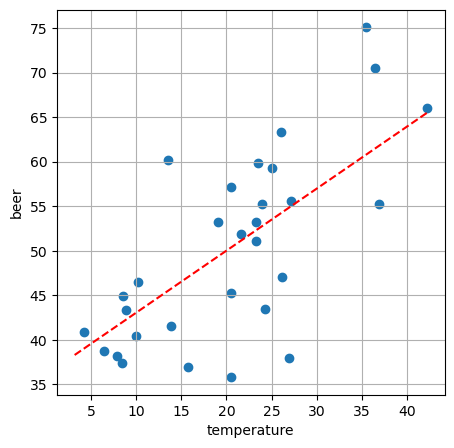

In [183]:
# 수집한 데이터셋 시각화 (예측값 직선 만들기)
## - 원래 x값의 최소보다 조금 작게(xx), 최대보다 조금 크게(yy) 그려야 함
plt.figure(figsize = (5,5))
plt.scatter(beer.temperature, beer.beer)
plt.grid()

# 예측값을 나타내는 선을 만드는 과정(예측선)
xx = np.arange(beer.temperature.min() - 1,  
               beer.temperature.max() + 1)
## - yy는 2차원 배열이니, xx를 2차원 배열로 만들기
yy = reg.predict(xx.reshape(-1, 1))
plt.plot(xx, yy, linestyle = '--', color = 'red')  

plt.xlabel('temperature')
plt.ylabel('beer');
# linestyle = ls | 마지막에 () ; 하면 [<matplotlib.lines.Line2D at 0x2c55c5d3d00>] 없어짐
# color = c

# 응용1. 나이, 키의 관계를 회귀 분석

In [231]:
# 필요한 모듈 import 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### 데이터 생성/수집

In [122]:
age_height = pd.read_csv('C:/python/data/age_height.csv')
age_height

,age(X),height(T)
0,15.425550,170.910131
1,23.008112,160.675599
2,5.002859,129.002066
3,12.558314,159.701396
4,8.668897,155.460589
5,7.308465,140.561344
6,9.656505,153.654664
7,13.639018,159.429396
8,14.919187,164.704239
9,18.470418,169.645276


#### 데이터 탐색

In [123]:
# 데이터 분포 시각화

In [132]:
age_height['age(X)']

0     15.425550
1     23.008112
2      5.002859
3     12.558314
4      8.668897
5      7.308465
6      9.656505
7     13.639018
8     14.919187
9     18.470418
10    15.479863
11    22.130488
12    10.111306
13    26.952936
14     5.684690
15    21.761688
Name: age(X), dtype: float64

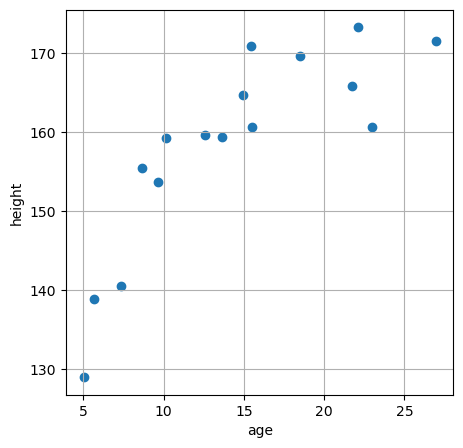

In [135]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
plt.scatter(age_height['age(X)'], age_height['height(T)'])
plt.xlabel('age')
plt.ylabel('height')
plt.grid() # 격자 추가
plt.show()

#### 데이터 준비 - 학습용 / 검증용 데이터 분리

In [138]:
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
# [1] 데이터셋 준비 (1차원 -> 2차원으로)

x = np.array(age_height['age(X)']).reshape(-1, 1)
y = np.array(age_height['height(T)'])

# [2] 학습용, 검증용 데이터 set 분리

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# [3] 학습용, 검증용 크기 확인
len(x_train), len(x_test), len(y_train), len(y_test)

(12, 4, 12, 4)

In [139]:
#####모델 구축 및 예측
from sklearn.linear_model import LinearRegression

In [140]:
#모델 객체 생성  및 학습
lr = LinearRegression()
reg = lr.fit(x_train, y_train)
# 예측 수행
y_pred = reg.predict(x_test)


In [142]:
#####모델 성능 평가

#MSE : metrcics 모듈의 mean_squared_error() 함수 사용
#RMSE : numpy의 sqrt() 함수 사용

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# MSE

mse = mean_squared_error(y_test, y_pred)

#RMSE

rmse = np.sqrt(mse)

#결정계수 R2

r2 = r2_score(y_test, y_pred)

#회귀식

print(mse, rmse, r2)

83.49484660286443 9.137551455552217 0.6627884107222466


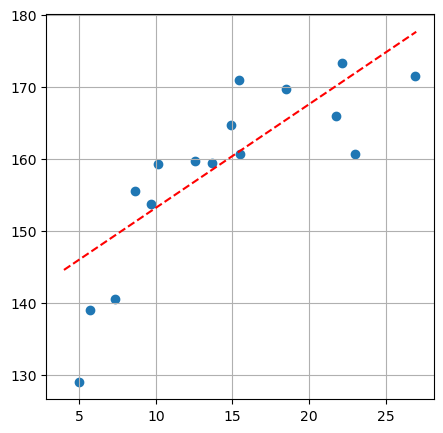

In [145]:
#나이, 키 데이터 실제 데이터 및 회귀식 시각화

plt.figure(figsize = (5,5))
xx = np.arange(age_height['age(X)'].min() -1, age_height['age(X)'].max() +1)
yy = reg.predict(xx.reshape(-1, 1))

plt.plot(xx, yy, ls = '--', c = 'red')

#y = 0.697056X + 36.06 시각화

# [2] 원데이터 시각화
plt.scatter(age_height['age(X)'], age_height['height(T)'])
plt.grid();

# < 스탯츠모델에서 단순선형회귀 수행>

In [207]:
#스탯츠모델 import
import statsmodels.api as sm

# 맥주 데이터 
# 데이터 생성

beer = pd.read_csv('C:/python/data/beer.csv')

#독립변수, 종속변수 데이터셋 준비

x = np.array(beer.temperature).reshape(-1,1)
y = beer.beer

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
x_test

array([[ 1. , 35.5],
       [ 1. , 20.5],
       [ 1. , 26.2],
       [ 1. , 20.5],
       [ 1. ,  8.4],
       [ 1. , 10.2]])

In [208]:
# 스탯츠모델
lr = sm.OLS(y_train,x_train)
reg = lr.fit()

In [209]:
# 성능 평가
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   beer   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     22.63
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           9.50e-05
Time:                        14:20:10   Log-Likelihood:                -79.854
No. Observations:                  24   AIC:                             163.7
Df Residuals:                      22   BIC:                             166.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0667      3.315     10.881      0.0

# 응용2: 농어 무게 예측

In [228]:
import numpy as np
# 길이가 무계에 영향을 미침 
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])
# test_size = 0.2/random_state = 1

In [233]:
# length 를 2차원으로
perch_length = perch_length.reshape(-1,1)
perch_length.shape
#2차원 array야

(56, 1)

In [234]:
x_train, x_test, y_train, y_test = train_test_split(\
                                    perch_length,perch_weight, test_size = 0.2, random_state = 1)


In [235]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
reg = lr.fit(x_train, y_train)

In [236]:
print(lr.coef_, lr.intercept_)

[35.63110638] -618.3317511711566


In [237]:
y_pred = reg.predict(x_test)

In [241]:
# 5. 모델 성능 평가
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# MSE
mse = mean_squared_error(y_test, y_pred)

#RMSE
rmse = np.sqrt(mse)

#결정계수 R2
r2 = r2_score(y_test, y_pred)

# 회귀식
print(mse, rmse, r2)

14550.23701560241 120.62436327542794 0.8803330236667549


In [242]:
# 시각화
import matplotlib.pyplot as plt


NameError: name 'im' is not defined

# 응용3: 보스턴 집값 선형 회귀

### 데이터 수집

In [243]:
# version차이

# from sklearn.datasets import load_boston

# boston = load_boston()

from sklearn import datasets

boston = datasets.fetch_openml('boston')
boston

C:\Users\Playdata\AppData\Roaming\Python\Python39\site-packages\sklearn\datasets\_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
C:\Users\Playdata\AppData\Roaming\Python\Python39\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
 0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
 1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
 2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
 3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
 4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
 ..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
 501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
 502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
 503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
 504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
 505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       

### 데이터 탐색

In [244]:
dir(boston)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [246]:
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [247]:
print(boston.data[:5])

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  


In [248]:
print(boston.target[:5])

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [249]:
print(boston.feature_names)
print(boston.target_names)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
['MEDV']


### 데이터 준비

In [227]:
# boston 데이터에서 독립변수(RM), 종속 변수를 각각 골라내고 데이터프레임으로 변환
import pandas as pd

x = boston.data.RM
y = boston.target

x

NameError: name 'boston' is not defined

In [ ]:
#데이터 탐색
# RM 과 MEDV의 관계 시각화
plt.figure(figsize = (5,5))
plt.scatter(x,y, s = 5, c = 'red')
plt.xlabel('room')
plt.ylabel('price')
plt.grid()
plt.show()

### 학습용/ 검증용 데이터 분리

In [ ]:
# 조건 : 학습 7, 검증 3
# seed  = 1로 고정
##### 5분 실습 / 결정 계수를 구하라       test_size = 0.3/random_state = 21


### 모델 구축

### 모델 평가

### 시각화